# Step6 演習02 SVMとその利用
---

Step6ではscikit-learnを用いてSVMの実装を行います。

scikit-learnのSVMは台湾大学が開発しているLIBSVMのラッパーとして実装されています。

LIBSVMはとても著名なライブラリーです。

Python以外の言語でSVMを用いるときも必ずと言ってよいほどお世話になるでしょう。

また、カーネル法を用いない素のSVMのことを線形SVMと呼ぶのでした。ほぼ線形分離可能であるように見えるサンプルデータを作成し、それを用いて学習させてみます。


**はじめに**
- for文やwhile文の利用は明示的な利用指示がない場所での使用は避けてください。

**本演習の目的**
- 線形SVMの実装を行う。

## ライブラリのインポート

まずはじめに、利用するライブラリのインポートを行います。

- [numpy](http://www.numpy.org) 数値計算を行うための基本パッケージの公式ドキュメント
- [matplotlib](http://matplotlib.org) グラフ描画ライブラリの基本パッケージの公式ドキュメント
- [scikit-learnチュートリアル sklearn.svm.SVC](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)
- [LIBSVM](http://www.csie.ntu.edu.tw/~cjlin/libsvm/) 

ドキュメントには有用な情報が書き記されています。何か迷ったときには必ずドキュメントに戻ってくるようにしましょう。

次のセルをそのまま実行（"SHIFT" + "ENTER"）してください。コードが書いてあるセルは**上から順番に**順次実行してください。

** 注意： **初めてmatplotlibを使うユーザーは、フォント一覧のキャッシュが存在しないため、このセルの実行でWarningが出ます。もう一度実行すると、すでにキャッシュができているので、Warningなく走ります。

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn import datasets
import os
font = {'family':'IPAexGothic'}
plt.rc('font', **font)

## ガウシアンカーネルを使ったSVM

ここまでのことならば、ロジスティック回帰でも似たようなことができそうです。では、SVMで活用できる強力な手法、カーネルトリックを使ってみましょう。

### データ集合2の生成
まず、線形SVMでは対処できないデータを生成します。

In [2]:
if os.path.isfile("./dataStep6/dataStep6_2.csv") == True:
    data = np.loadtxt("./dataStep6/dataStep6_2.csv", delimiter = ",")
    X = data[:,0:2]  # X.shapeは(100, 2)
    y = data[:,2] #y.shapeは(100, ) 1-dimのndarrayにしておく（縦ベクトルにならないこと注意）

else:
    X, y = datasets.make_moons(n_samples=1000, noise=0.3, random_state=0)
#    X = X * 12.5 + 50 # -4から4くらいから0から100くらいに変える
    np.savetxt("./dataStep6/dataStep6_2.csv", np.c_[X, y], delimiter=",", fmt="%f,%f,%d")

上のセルを実行したことによりデータセットを "data" に格納しました。下のセルを実行して、dataのshapeを確認しましょう。

In [3]:
data.shape

(1000, 3)

(1000,3)と表示されたはずです。
<br>
<br>
このデータセットは、1000行3列の行列が格納されています。Xにdataの2列目までのデータセットを格納し、yにdataの3列目のデータを格納しています。下のセルを実行して、格納したdataの中身の一部分を確認してみましょう。

In [4]:
data[:5]

array([[ 2.129573,  0.629904,  1.      ],
       [ 1.888882,  0.146257,  1.      ],
       [-0.190357,  0.383993,  0.      ],
       [-0.404416,  0.195282,  1.      ],
       [ 0.373012, -0.429716,  1.      ]])

In [5]:
data[:5,0][:,np.newaxis]

array([[ 2.129573],
       [ 1.888882],
       [-0.190357],
       [-0.404416],
       [ 0.373012]])

In [6]:
data[:5,1][:,np.newaxis]

array([[ 0.629904],
       [ 0.146257],
       [ 0.383993],
       [ 0.195282],
       [-0.429716]])

In [7]:
data[:5,2][:,np.newaxis]

array([[1.],
       [1.],
       [0.],
       [1.],
       [1.]])

dataの中身を訓練データ X と目標変数 y にわけました。** X **と ** y ** のデータを改めてshapeで確認しておきましょう。

In [8]:
X.shape

(1000, 2)

In [9]:
y.shape

(1000,)

## データセットの視覚化

### 生成したデータの表示

視覚化は機械学習の実装において大変重要な作業になります。開発を進める前にデータセットの性質を把握し、視覚化する癖をつけておきましょう。

**【課題１】** 生成したデータをプロットする関数`plotData(X, y)`を書きましょう。y=1のデータは`marker='+'`、y=0のデータは`marker='o'`でプロットしましょう。（Step6_02の課題１と同じ問題なので同じ課題番号を振っています。）

In [10]:
#Coursemale-02 Step6 QuestionNumber1 aa31cf959af12a077cd8d41f3e575a7e
def plotData(X, y):
###############ここを穴埋めしてください###############
#適切な 関数・変数・値 などにNoneを書き換えてください。
    pos = (y == 1)
    neg = (y == 0)

    plt.hold(True)
    plt.scatter(X[pos,0], X[pos,1], marker='+')
    plt.scatter(X[neg,0], X[neg,1], marker='o')
    
    plt.xlim(X[:,0].min(),X[:,0].max())
    plt.ylim(X[:,1].min(),X[:,1].max())

    plt.draw()
######################################################

左上の**保存マークをクリックした後**、次のセルをShift+Enterで実行して採点します。

In [11]:
%%bash
./validation_client.py male-02 6 1 Step6_02.ipynb api.internal.zero2one.jp

Congratulations!
We give you 10 points out of 10 points.



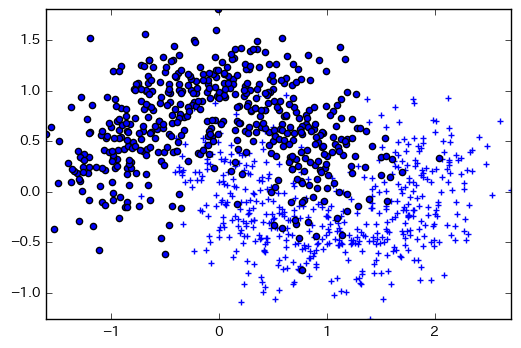

In [12]:
plotData(X, y)

### 学習

RBFカーネル(Radial Basis Function Kernel つまり ガウシアンカーネル)によるSVMを学習させます。`kernel = "rbf"`と渡してやるだけでガウシアンカーネルを利用できます。

講義ではガウシアンカーネルを$$K(\boldsymbol{x}-\boldsymbol{l}^{(i)})=\exp\left(-\frac{||\boldsymbol{x}-\boldsymbol{l}^{(i)}||^2}{2\sigma^2}\right)$$と書きましたが、scikit-learnでは$\sigma$を用いず、$$K(\boldsymbol{x}-\boldsymbol{l}^{(i)})=\exp(-\gamma||\boldsymbol{x}-\boldsymbol{l}^{(i)}||^2)$$というようにパラメータとして$\gamma$を用いています。

$\gamma$はデフォルトでは`auto`です。これは状況に応じた最適な値をきめ細やかに自動で選んでくれるわけではなく、特徴の数の逆数を$\gamma$の値として利用するだけです。

これで上手くいくことも多いですが、今回は手動で指定したいと思います。余力があれば、値を変えてみましょう。

In [13]:
sigma = 0.1
gamma = 1.0 / (2.0 * sigma ** 2)

正則化パラメータの逆数のようなものであるC値は、とりあえず1とします。余力があれば、C値を変えるとSVMの挙動はどう変わるのか、まず想像した上で、実際に試してみましょう。

In [14]:
C = 1

**【課題２】** ガウシアンカーネルを用いて学習させましょう。

In [16]:
#Coursemale-02 Step6 QuestionNumber2 90cd72149a9620c34579c530572a5509
###############ここを穴埋めしてください###############
estimator = svm.SVC(C=1, kernel='rbf', gamma=gamma)
estimator.fit(X, y)
######################################################

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=49.99999999999999,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

左上の**保存マークをクリックした後**、次のセルをShift+Enterで実行して採点します。

In [17]:
%%bash
./validation_client.py male-02 6 2 Step6_02.ipynb api.internal.zero2one.jp

Congratulations!
We give you 10 points out of 10 points.



### 学習結果のプロット

学習によって得られた決定境界をプロットします。

In [18]:
def visualizeBoundary(X, y, estimator):
    plotData(X, y)
    plt.hold(True)

    # タテヨコ300x300個を決定境界を引くサンプルにします
    sample_num = 300
    
    x1plot = np.linspace(min(X[:,0]), max(X[:,0]), sample_num)
    x2plot = np.linspace(min(X[:,1]), max(X[:,1]), sample_num)
    X1, X2 = np.meshgrid(x1plot, x2plot)

    # それぞれのサンプルに関して予測値を計算
    vals = np.array([estimator.predict(np.column_stack((X1[:, i], X2[:, i]))) for i in range(X1.shape[1])]).T

#    #内包表記を使わないと以下のようになる
#    vals = np.empty(X1.shape)
#    for i in range(X1.shape[1]):
#        this_X = np.column_stack((X1[:, i], X2[:, i]))
#        vals[:, i] = estimator.predict(this_X)

    #等高線を使って予測値が0である地点と1である地点の境界をプロット
    plt.contour(X1, X2, vals)
    plt.show()

/opt/conda/lib/python3.5/site-packages/numpy/ma/core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/opt/conda/lib/python3.5/site-packages/numpy/ma/core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


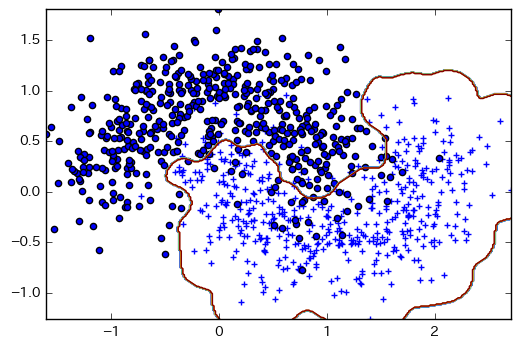

In [19]:
visualizeBoundary(X, y, estimator)